In [1]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import pandas as pd 
import numpy as np
np.set_printoptions(precision=17)

In [4]:
df_data = []
df_data.append(pd.read_csv(f"../../result/flux_tube/qc2dstag/32^4/HYP_APE/flux_tube_mu0.40.csv"))

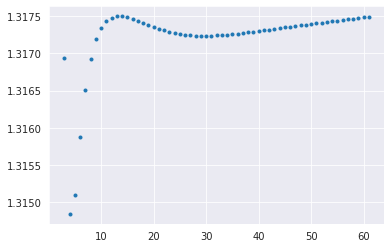

In [6]:
for i in df_data:
    i['field'].iloc[3:].plot(style='.')
    plt.show()